# Non-Linear Regression with `scipy.optimize.least_squares`

## Introduction
Non-linear regression is used to model complex relationships between variables. In Python, we can use the `least_squares` function from `scipy.optimize` to estimate the parameters of a non-linear model.

This tutorial will guide you through solving non-linear regression problems, starting from a simple single-parameter function and moving towards a more complex two-parameter function.

## Example 1: Fitting a Simple Exponential Model

We begin with a simple non-linear function:

$$
 y = a e^x
$$

where we want to estimate `a` given a set of noisy observations.

### Step 1: Generate Synthetic Data

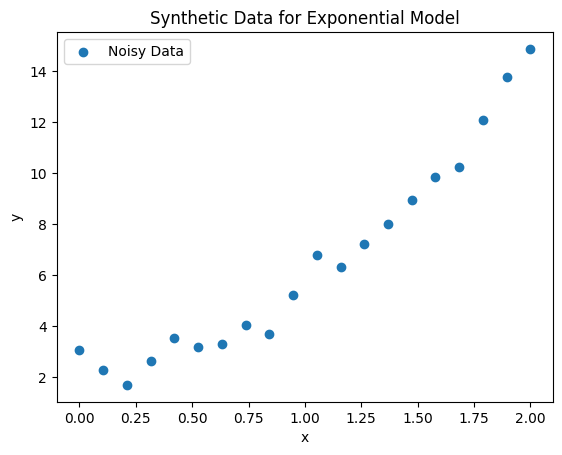

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import least_squares

# True parameter
a_true = 2.0

# Generate synthetic data
x_data = np.linspace(0, 2, 20)
y_data = a_true * np.exp(x_data) + np.random.normal(scale=0.5, size=len(x_data))

# Plot data
plt.scatter(x_data, y_data, label='Noisy Data')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Synthetic Data for Exponential Model')
plt.legend()
plt.show()

### Step 2: Define the Residual Function
We define the function to be minimized, which computes the difference between observed and predicted values:

In [2]:
model = lambda a, x: a * np.exp(x)
def residuals(a, x, y):
    return model(a, x) - y

### Step 3: Optimize the Parameter

In [3]:
# Initial guess
a0 = [1.0]

# Perform optimization
result = least_squares(residuals, a0, args=(x_data, y_data))

# Print results
print("Estimated a:", result.x[0])

Estimated a: 2.0129816546218047


### Step 4: Visualize the Fit

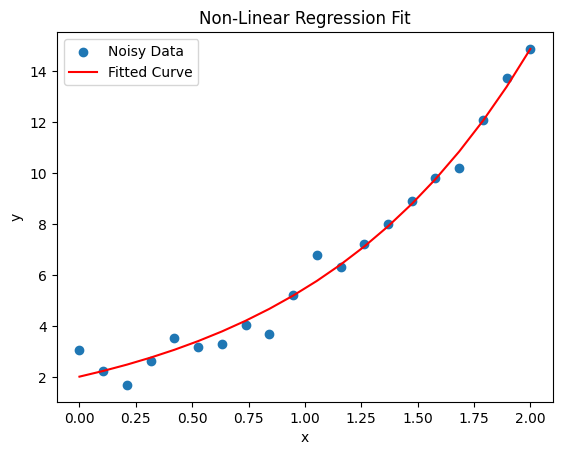

In [4]:
# Predicted values
y_fit = model(result.x[0], x_data)

plt.scatter(x_data, y_data, label='Noisy Data')
plt.plot(x_data, y_fit, color='red', label='Fitted Curve')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Non-Linear Regression Fit')
plt.legend()
plt.show()

## Example 2: Fitting a Sigmoid Function with Two Parameters
Next, we fit a more complex function:

$$
 y = \frac{a}{1 + e^{-b(x - x_0)}}
$$

where `a` and `b` are parameters to be estimated.

### Step 1: Generate Synthetic Data

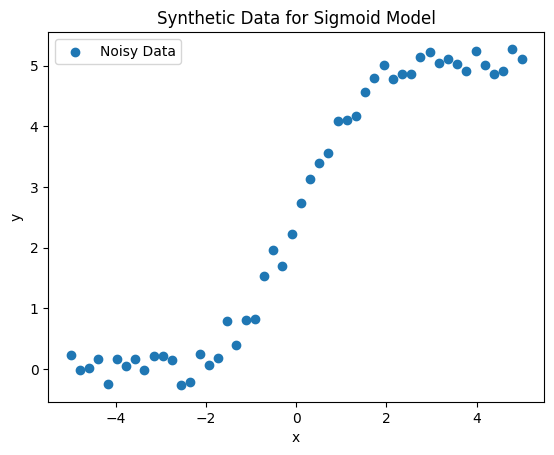

In [5]:
# True parameters
a_true, b_true = 5, 1.5

# Generate synthetic data
x_data = np.linspace(-5, 5, 50)
y_data = a_true / (1 + np.exp(-b_true * x_data)) + np.random.normal(scale=0.2, size=len(x_data))

plt.scatter(x_data, y_data, label='Noisy Data')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Synthetic Data for Sigmoid Model')
plt.legend()
plt.show()

### Step 2: Define the model and the residual function

In [6]:
model = lambda a, b, x: a / (1 + np.exp(-b * x))

def sigmoid_residuals(params, x, y):
    a, b = params
    return model(a, b, x) - y

### Step 3: Optimize the Parameters

In [7]:
# Initial guess
initial_guess = [1.0, 1.0]

# Perform optimization
result = least_squares(sigmoid_residuals, initial_guess, args=(x_data, y_data))

# Print results
print("Estimated a:", result.x[0])
print("Estimated b:", result.x[1])

Estimated a: 5.059160511562091
Estimated b: 1.4809350995418764


### Step 4: Visualize the Fit

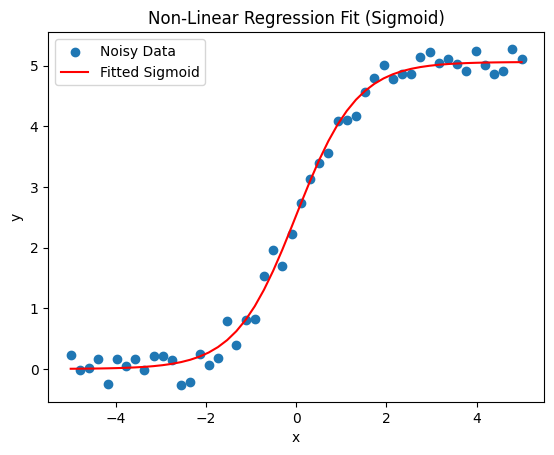

In [8]:
# Predicted values
y_fit = model(result.x[0], result.x[1], x_data)

plt.scatter(x_data, y_data, label='Noisy Data')
plt.plot(x_data, y_fit, color='red', label='Fitted Sigmoid')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Non-Linear Regression Fit (Sigmoid)')
plt.legend()
plt.show()